# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\lilanqing\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 数据预处理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()
x_Train.shape

(60000, 28, 28)

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
x_Train4D_normalize.shape

(60000, 28, 28, 1)

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [10]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(128, activation='relu'))

In [15]:
model.add(Dropout(0.5))

In [16]:
model.add(Dense(10,activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 训练模型

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [21]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 47s - loss: 0.4896 - acc: 0.8472 - val_loss: 0.0977 - val_acc: 0.9717
Epoch 2/20
 - 47s - loss: 0.1413 - acc: 0.9586 - val_loss: 0.0636 - val_acc: 0.9811
Epoch 3/20
 - 46s - loss: 0.1027 - acc: 0.9688 - val_loss: 0.0513 - val_acc: 0.9847
Epoch 4/20
 - 46s - loss: 0.0833 - acc: 0.9758 - val_loss: 0.0451 - val_acc: 0.9862
Epoch 5/20
 - 46s - loss: 0.0713 - acc: 0.9776 - val_loss: 0.0394 - val_acc: 0.9878
Epoch 6/20
 - 46s - loss: 0.0641 - acc: 0.9809 - val_loss: 0.0397 - val_acc: 0.9883
Epoch 7/20
 - 46s - loss: 0.0560 - acc: 0.9832 - val_loss: 0.0431 - val_acc: 0.9873
Epoch 8/20
 - 46s - loss: 0.0502 - acc: 0.9846 - val_loss: 0.0335 - val_acc: 0.9898
Epoch 9/20
 - 46s - loss: 0.0451 - acc: 0.9864 - val_loss: 0.0330 - val_acc: 0.9903
Epoch 10/20
 - 46s - loss: 0.0415 - acc: 0.9872 - val_loss: 0.0316 - val_acc: 0.9908
Epoch 11/20
 - 46s - loss: 0.0401 - acc: 0.9878 - val_loss: 0

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

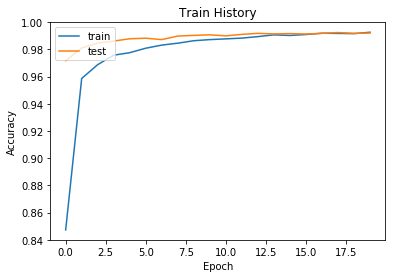

In [23]:
show_train_history('acc','val_acc')

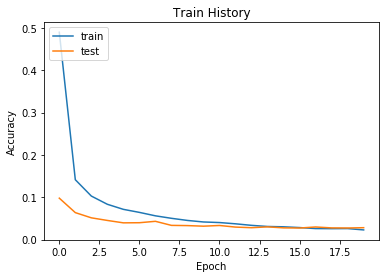

In [24]:
show_train_history('loss','val_loss')

# 评估模型的准确率

In [26]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 455us/step


0.9933

# 预测结果

In [27]:
prediction=model.predict_classes(x_Test4D_normalize)

In [28]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# 查看预测结果

In [29]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

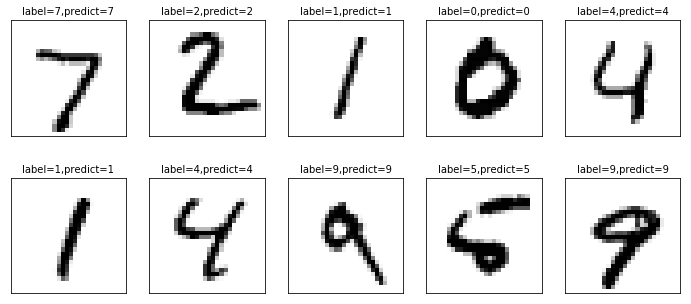

In [30]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

# confusion matrix

In [31]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,0,1,2,0
1,0,1130,2,0,0,1,1,1,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,1,1001,0,4,0,1,3,0
4,0,0,0,0,978,0,0,0,1,3
5,0,0,0,4,0,886,1,0,0,1
6,3,2,0,0,2,1,949,0,1,0
7,0,3,4,0,1,0,0,1016,1,3
8,1,0,1,2,0,1,0,0,968,1


In [32]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [33]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2369,5,3
2597,5,3
5937,5,3
